Joe has requested before we delete particles of the new sims we double check that the mass functions look sensible. I'll do that, and whatever tests are proposed, here.

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
from pearce.mocks.kittens import TrainingBox
import numpy as np
from os import path
from glob import glob

In [56]:
cat = TrainingBox(0)

In [57]:
cat.load(1.0, HOD='zheng07')

In [58]:
mass_bins = np.logspace(9, 16, (16-9)/0.1+1)
mf = cat.calc_mf(mass_bin_size = 0.1, min_ptcl=20)

In [59]:
mbc = (mass_bins[1:] + mass_bins[:-1])/2

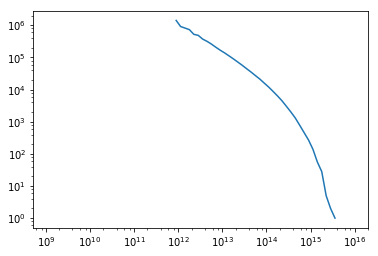

In [60]:
plt.plot(mbc, mf)
plt.loglog();

In [65]:
#highres_emu_dir = '/oak/stanford/orgs/kipac/users/jderose/highres_emu/'
#highres_emu_dir = '/oak/stanford/orgs/kipac/aemulus/highres_emu/Box000/output/rockstar'
highres_emu_dir = '/oak/stanford/orgs/kipac/aemulus/highres_emu/Box000_sherlock/output/rockstar'

In [66]:
from halotools.sim_manager import RockstarHlistReader 
columns_to_keep = {'halo_id': (0, 'i8'), 'halo_upid': (1, 'i8'), # actually the DescID? 
                'halo_x': (8, 'f4'), 'halo_y': (9, 'f4'), 'halo_z': (10, 'f4'),
                'halo_vx': (11, 'f4'), 'halo_vy': (12, 'f4'), 'halo_vz': (13, 'f4'),
                'halo_mvir': (2, 'f4'), 'halo_rvir': (5, 'f4'), 'halo_rs': (6, 'f4')}

ID DescID Mvir Vmax Vrms Rvir Rs Np X Y Z VX VY VZ JX JY JZ Spin rs_klypin Mvir_all M200b M200c M500c M2500c Xoff Voff spin_bullock b_to_a c_to_a A[x] A[y] A[z] b_to_a(500c) c_to_a(500c) A[x](500c) A[y](500c) A[z](500c) T/|U| M_pe_Behroozi M_pe_Diemer Halfmass_Radius


In [67]:
N = 202
fname = path.join(highres_emu_dir, 'out_%d.list'%(N-1))
simname = 'AemulusBeta'
#Particle mass: 6.39984e+08 Msun/h
#Box size: 200.000000 Mpc/h
pmass = 6.39984e8
Lbox = 400.0
cache_fname = '/home/users/swmclau2/scratch/hlists/AemulusBeta000.hdf5'

In [68]:
reader = RockstarHlistReader(fname, columns_to_keep, cache_fname, simname,
                                         'rockstar', 0.0, 'most_recent', Lbox, pmass,
                                         overwrite=False)
reader.read_halocat(["halo_rvir", "halo_rs"])




The information about your ascii file and the metadata about the catalog 
have been processed and no exceptions were raised. 
Use the ``read_halocat`` method to read the ascii data, 
setting the write_to_disk and update_cache_log arguments as you like. 
See the docstring of the ``read_halocat`` method
for details about these options. 


...Processing ASCII data of file: 
/oak/stanford/orgs/kipac/aemulus/highres_emu/Box000_sherlock/output/rockstar/out_201.list
 
Total number of rows in detected data = 18248878
Number of rows in detected header = 16 

... working on chunk 0 of 12
... working on chunk 1 of 12
... working on chunk 2 of 12
... working on chunk 3 of 12
... working on chunk 4 of 12
... working on chunk 5 of 12
... working on chunk 6 of 12
... working on chunk 7 of 12
... working on chunk 8 of 12
... working on chunk 9 of 12
... working on chunk 10 of 12
... working on chunk 11 of 12
Total runtime to read in ASCII = 2.5 minutes




In [69]:
halo_table = reader.halo_table

In [70]:
beta_mf = np.histogram(halo_table['halo_mvir'], bins = mass_bins)[0]

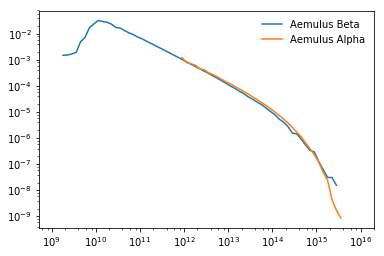

In [71]:
plt.plot(mbc, beta_mf/Lbox**3, label = 'Aemulus Beta ')
plt.plot(mbc, mf/(cat.Lbox**3), label = 'Aemulus Alpha')
plt.loglog();
plt.legend(loc='best', frameon=False)